### Example using Isoprene data

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

In [2]:
# open the dataset
ds = xr.open_dataset('/nfs/a68/earlacoa/shared/ISOP_MEGAN-MOHYCAN_2016.nc')

# extract the data array
flux = ds['Flux']

# calculate the annual mean
flux_annual_mean = flux.mean(dim='month')

# check the max
flux_annual_mean.max()

<xarray.DataArray 'Flux' ()>
array(1.3333668e+12, dtype=float32)

In [3]:
# normally we would use the lon and lat coordinates from the dataset
#lon = ds.lon.values
#lat = ds.lat.values

# however this dataset just has them as sequential integers, rather than actual coordinates in degrees
ds.lat

<xarray.DataArray 'lat' (lat: 360)>
array([  0,   1,   2, ..., 357, 358, 359])
Dimensions without coordinates: lat

In [4]:
# on the website (https://emissions.aeronomie.be/index.php/bottom-up/isoprenev2018) it mentions that there are: 
# 720 longitudes from 0.25 to 359.75° W
# 360 latitudes from 89.75° N to 89.75° S
# therefore we can create the lon and lat coordinates ourselves using np.linspace which takes a start, stop, and a step:
lon = np.linspace(0.25, 359.75, 720) # just in the west direction
lat = np.linspace(89.75, -89.75, 360) # from north (positive) to south (negative)

In [5]:
# now we can create the meshed coordinates for our plot
xx, yy = np.meshgrid(lon, lat)

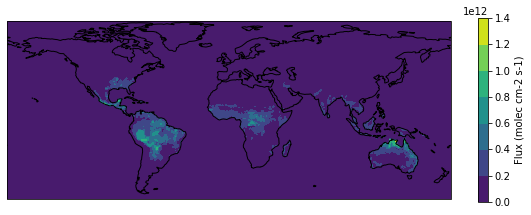

In [6]:
# now we can create the plot
fig = plt.figure(1, figsize=(8, 4))
gs = gridspec.GridSpec(1, 1)

ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 85], crs=ccrs.PlateCarree())
ax.coastlines()
im = ax.contourf(xx, yy, flux_annual_mean, transform=ccrs.PlateCarree())
fig.colorbar(im, label='Flux (molec cm-2 s-1)', shrink=0.69)

plt.tight_layout()
plt.show()

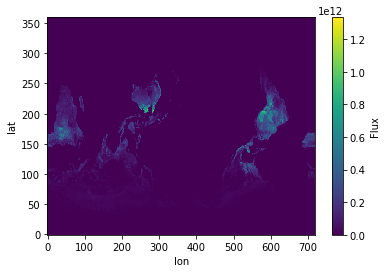

In [7]:
# by the way, xarray has its own plotting function built in (provided by matplotlib)
# which can handle anything as coordinates (e.g. the sequential integers)
# and it can be useful for creating quick plots and checking that the dataset has data (below)
# (notice that latitude and longitude are both upside down as it doesn't know how to arrange these)
flux_annual_mean.plot()

# also, in general I recommend using matplotlib directly (as above and in the course) as it is more customisable